In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../data/processed/stage4_moreNLP_labels.csv')

In [5]:
df.head()

,Unnamed: 0,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_val,weekid,year,month,hit
0,0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,"(Ugh) Ha-ha-ha, I'm serious, nigga One of y'a...",8,20,1,"['Ugh', 'Ha', 'ha', 'ha', 'serious', 'nigga', ...",344,184,0.534884,0.046,0.103,0.851,-0.9921,1994-01-29,1994,1,True
1,1,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,0.1810,0.0893,0.000000,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"Bomb ass pussy Ma, ooh you got that bomb, kno...",3,21,1,"['Bomb', 'ass', 'pussy', 'Ma', 'ooh', 'got', '...",563,296,0.525755,0.127,0.073,0.799,0.9907,2003-09-20,2003,9,True
2,2,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,0.0378,0.0264,0.000017,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"I've got to get away, I've got to get away I'...",14,16,1,"['got', 'get', 'away', 'got', 'get', 'away', '...",322,148,0.459627,0.059,0.076,0.864,-0.8737,1993-01-16,1993,1,False
3,3,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,0.1120,0.0389,0.000003,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,# 2Pac - Picture Me Rollin' 50 Cent - Get In M...,3,25,1,"['2Pac', 'Picture', 'Me', 'Rollin', '50', 'Cen...",321,235,0.732087,0.062,0.098,0.841,-0.9360,1994-06-04,1994,6,True
4,4,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,False,0.2920,0.0580,0.000000,0.6080,0.489,149.999,4.0,"DJ Khaled Featuring Drake, Rick Ross & Lil Wayne",I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"['The', 'Rap', 'Genius', 'Editors', 'Pick', 'T...",2651,932,0.351565,0.087,0.082,0.831,0.8670,2011-06-04,2011,6,True


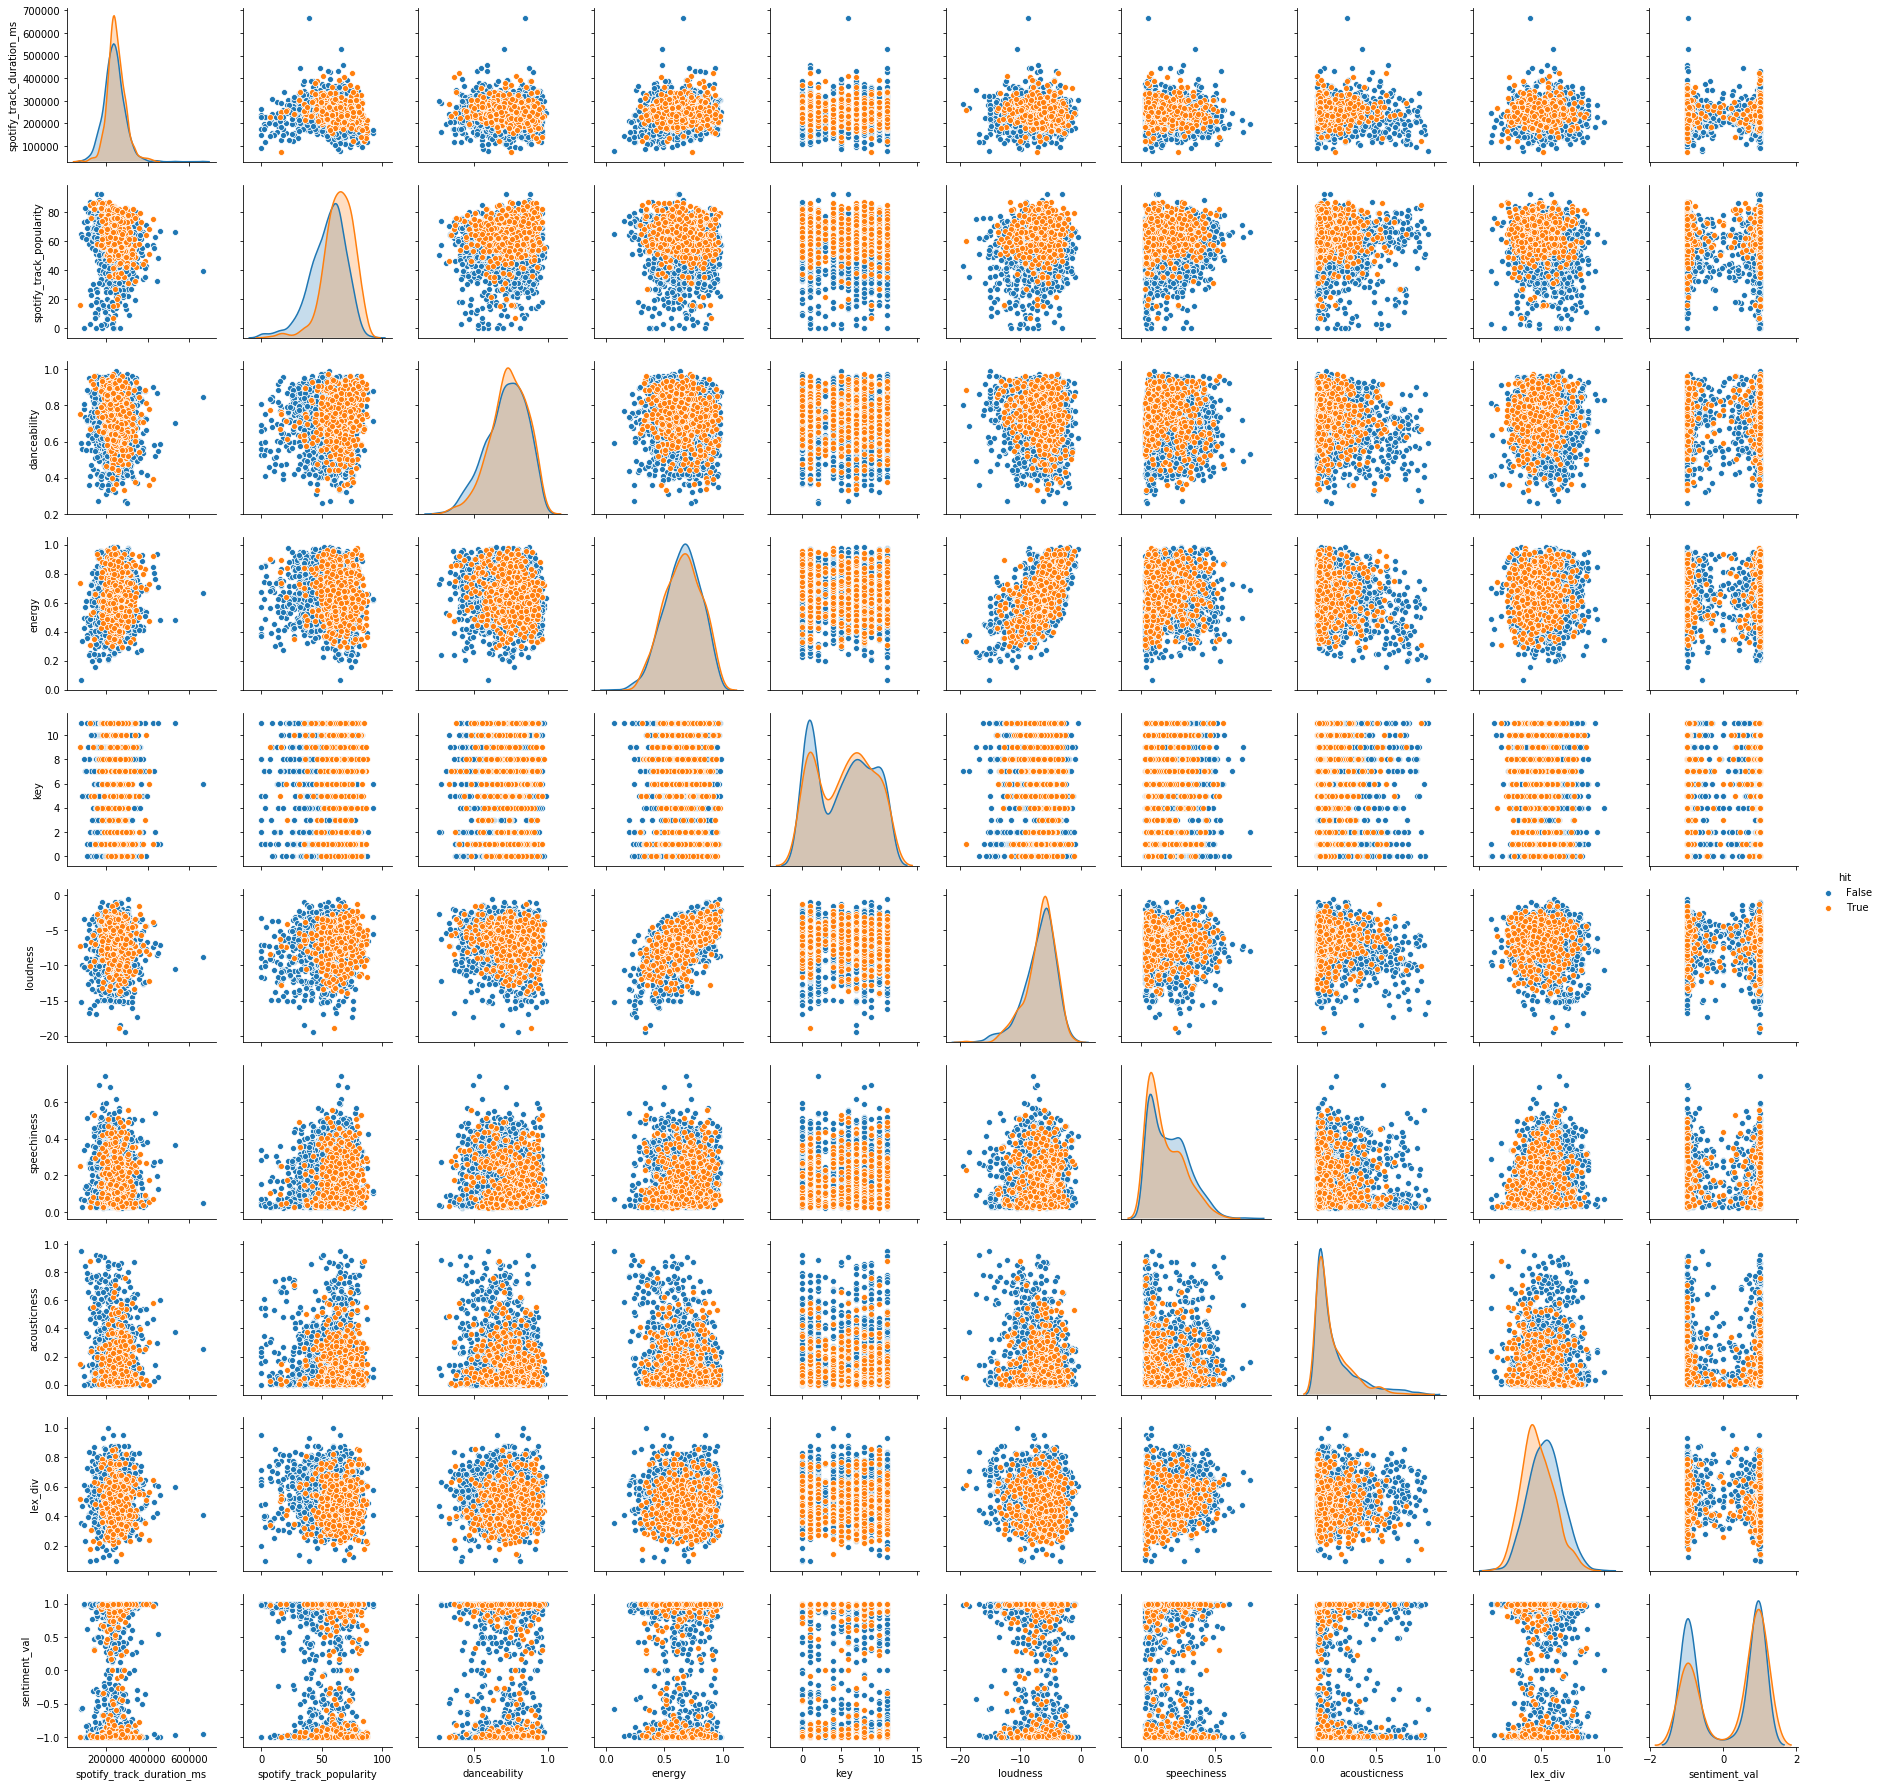

In [6]:
sns.pairplot(df, vars=[ 'spotify_track_duration_ms', 'spotify_track_popularity', 'danceability',
                         'energy', 'key', 'loudness', 'speechiness', 'acousticness',
                         'lex_div', 'sentiment_val'], hue='hit')